In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


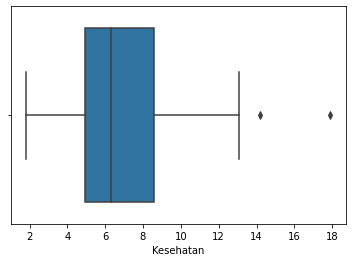

In [3]:
sns.boxplot('Kesehatan', data=df)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


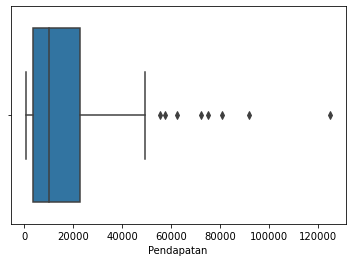

In [4]:
sns.boxplot('Pendapatan', data=df)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


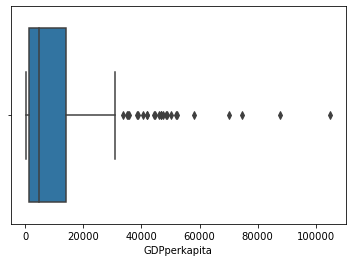

In [5]:
sns.boxplot('GDPperkapita', data=df)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


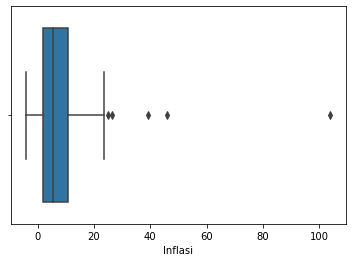

In [6]:
sns.boxplot('Inflasi', data=df)

In [7]:
def finding_outlier(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_final= df[(df<(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    return df_final

df_group = df[['Negara','Kematian_anak','Pendapatan','Harapan_hidup','GDPperkapita']].set_index('Negara')
finding_outlier(df_group)
df_group

,Kematian_anak,Pendapatan,Harapan_hidup,GDPperkapita
Negara,,,,
Afghanistan,90.2,1610,56.2,553
Albania,16.6,9930,76.3,4090
Algeria,27.3,12900,76.5,4460
Angola,119.0,5900,60.1,3530
Antigua and Barbuda,10.3,19100,76.8,12200
...,...,...,...,...
Vanuatu,29.2,2950,63.0,2970
Venezuela,17.1,16500,75.4,13500
Vietnam,23.3,4490,73.1,1310


In [8]:
def remove_outlier(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_final= df[((df<(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR))))]
    return df_final

In [9]:
df2 = remove_outlier(df_group)
df2.dropna(axis= 0, inplace= True)
df2

,Kematian_anak,Pendapatan,Harapan_hidup,GDPperkapita
Negara,,,,
Afghanistan,90.2,1610.0,56.2,553.0
Albania,16.6,9930.0,76.3,4090.0
Algeria,27.3,12900.0,76.5,4460.0
Angola,119.0,5900.0,60.1,3530.0
Antigua and Barbuda,10.3,19100.0,76.8,12200.0
...,...,...,...,...
Vanuatu,29.2,2950.0,63.0,2970.0
Venezuela,17.1,16500.0,75.4,13500.0
Vietnam,23.3,4490.0,73.1,1310.0


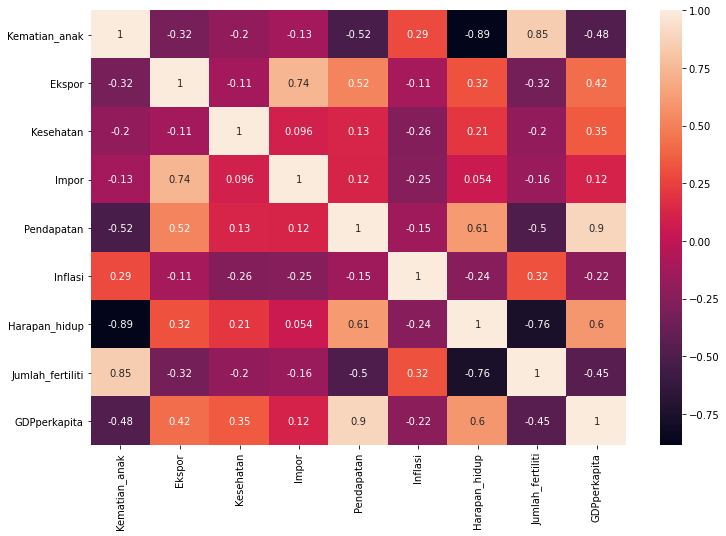

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot= True)

Elbow graph


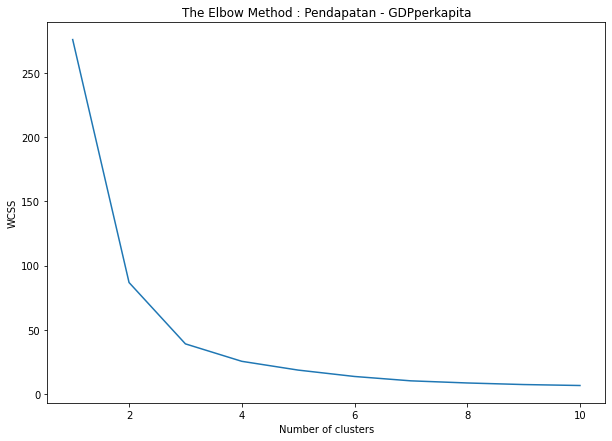

In [13]:
###corr 1 = Pendapatan - GDPperkapita

##Scalling Data
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df2[['Pendapatan','GDPperkapita']])
df_scaler
df_cluster = pd.DataFrame(data=df_scaler, columns=['Pendapatan','GDPperkapita'])

##elbow 1
wcss = []
plt.figure(figsize=(10,7))
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster)
    #print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
print('Elbow graph')
plt.title('The Elbow Method : Pendapatan - GDPperkapita')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

n_cluster =4


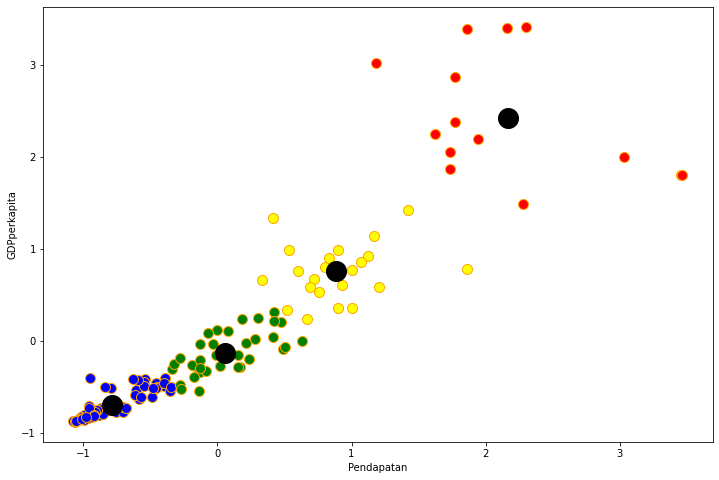

In [14]:
###clustering kmeans k=4, corr1
kmeans1 = KMeans(n_clusters=4, random_state=42).fit(df_scaler)
labels1 = kmeans1.labels_
df_cluster['labels1'] = labels1 
df_cluster


##visualsisasi corr 1
print('n_cluster =4')
plt.figure(figsize=(12,8))
plt.scatter(df_cluster['Pendapatan'][df_cluster.labels1 == 0],
            df_cluster['GDPperkapita'][df_cluster.labels1 == 0],c='blue',s=100,edgecolor='orange')
plt.scatter(df_cluster['Pendapatan'][df_cluster.labels1 == 1],
            df_cluster['GDPperkapita'][df_cluster.labels1 == 1],c='red',s=100,edgecolor='orange')
plt.scatter(df_cluster['Pendapatan'][df_cluster.labels1 == 2],
            df_cluster['GDPperkapita'][df_cluster.labels1 == 2],c='yellow',s=100,edgecolor='orange')
plt.scatter(df_cluster['Pendapatan'][df_cluster.labels1 == 3],
            df_cluster['GDPperkapita'][df_cluster.labels1 == 3],c='green',s=100,edgecolor='orange')

plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], c ='black', s=400)
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

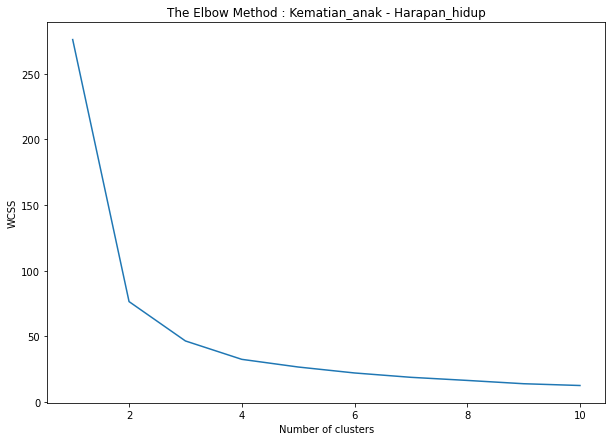

In [15]:
##corr 2 = Kematian_anak - Harapan_hidup

##Scalling Data
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df2[['Kematian_anak','Harapan_hidup']])
df_scaler
df_cluster = pd.DataFrame(data=df_scaler, columns=['Kematian_anak','Harapan_hidup'])

###elbow 2
wcss = []
plt.figure(figsize=(10,7))
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster)
    #print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method : Kematian_anak - Harapan_hidup')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

n_cluster =4


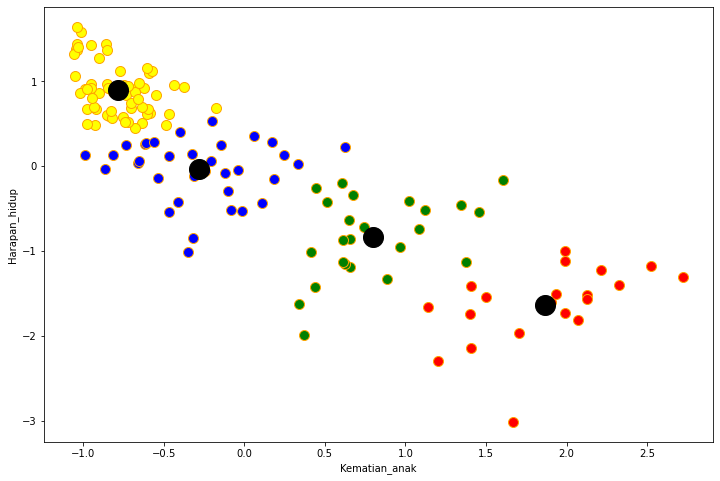

In [16]:
###clustering kmeans k=4, corr 2
kmeans1 = KMeans(n_clusters=4, random_state=42).fit(df_scaler)
labels2 = kmeans1.labels_
df_cluster['labels2'] = labels2 
df_cluster


##visualsisasi corr 2
print('n_cluster =4')
plt.figure(figsize=(12,8))
plt.scatter(df_cluster['Kematian_anak'][df_cluster.labels2 == 0],
            df_cluster['Harapan_hidup'][df_cluster.labels2 == 0],c='blue',s=100,edgecolor='orange')
plt.scatter(df_cluster['Kematian_anak'][df_cluster.labels2 == 1],
            df_cluster['Harapan_hidup'][df_cluster.labels2 == 1],c='red',s=100,edgecolor='orange')
plt.scatter(df_cluster['Kematian_anak'][df_cluster.labels2 == 2],
            df_cluster['Harapan_hidup'][df_cluster.labels2 == 2],c='yellow',s=100,edgecolor='orange')
plt.scatter(df_cluster['Kematian_anak'][df_cluster.labels2 == 3],
            df_cluster['Harapan_hidup'][df_cluster.labels2 == 3],c='green',s=100,edgecolor='orange')

plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], c ='black', s=400)
plt.xlabel('Kematian_anak')
plt.ylabel('Harapan_hidup')
plt.show()

In [20]:
df2['Pendapatan_GDPperkapita'] = labels1
df2['Kematian_Harapan'] = labels2


df_result = df2[(df2.Pendapatan_GDPperkapita == 0) & 
                     (df2.Kematian_Harapan == 1)]
df_result

,Kematian_anak,Pendapatan,Harapan_hidup,GDPperkapita,Pendapatan_GDPperkapita,Kematian_Harapan
Negara,,,,,,
Afghanistan,90.2,1610.0,56.2,553.0,0,1
Angola,119.0,5900.0,60.1,3530.0,0,1
Benin,111.0,1820.0,61.8,758.0,0,1
Burkina Faso,116.0,1430.0,57.9,575.0,0,1
Burundi,93.6,764.0,57.7,231.0,0,1
Cameroon,108.0,2660.0,57.3,1310.0,0,1
"Congo, Dem. Rep.",116.0,609.0,57.5,334.0,0,1
Cote d'Ivoire,111.0,2690.0,56.3,1220.0,0,1
Guinea,109.0,1190.0,58.0,648.0,0,1
